In [1]:
import tensorflow as tf
import cv2 
import matplotlib.pyplot as plt
import os
import numpy as np 
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
import matplotlib.gridspec as gridspec
from random import randint
from keras.utils import to_categorical
from tensorflow.keras import layers, models

In [2]:
def get_images(directory):
    images = []
    labels = []
    
    for dir in os.listdir(directory):
        label = -1
        if(dir == "buildings"):
            label = 0
        if(dir == "forest"):
            label = 1
        if(dir == "glacier"):
            label = 2
        if(dir == "mountain"):
            label = 3
        if(dir == "sea"):
            label = 4
        if(dir == "street"):
            label = 5
        for image_dir in os.listdir(directory +"\\"+ dir):
            image = cv2.imread(directory +"\\"+ dir + "\\"+ image_dir)
            image = cv2.resize(image, (150,150))
            images.append(image)
            labels.append(label)
    return shuffle(images, labels)


In [3]:
images, labels = get_images("G:\deep learning\Intel_natural_image_classifier\seg_train\seg_train")
images = np.array(images)
labels = np.array(labels)

In [4]:
print(labels[0])
labels = to_categorical(labels)
print(labels[0])

4
[0. 0. 0. 0. 1. 0.]


In [7]:
images = images.astype('float32')
images /= 255.0

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(filters = 96, kernel_size=(7,7), strides=(2,2), activation='relu', input_shape=(150,150,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3,3), strides=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3,3), strides=(2,2)))
model.add(layers.Conv2D(filters=256,kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3,3), strides=(2,2)))
model.add(layers.Conv2D(filters=192, kernel_size=(2,2), strides=(1,1), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding='valid'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3,3), strides=(1,1)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(96, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(6, activation='softmax'))

In [15]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 72, 72, 96)        14208     
_________________________________________________________________
batch_normalization_15 (Batc (None, 72, 72, 96)        384       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 35, 35, 96)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 35, 35, 128)       110720    
_________________________________________________________________
batch_normalization_16 (Batc (None, 35, 35, 128)       512       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 17, 17, 256)      

In [16]:
trained = model.fit(images, labels, epochs = 50, validation_split = 0.10)

Epoch 1/50
395/395 [==============================] - 1522s 4s/step - loss: 1.3304 - accuracy: 0.4776 - val_loss: 1.1179 - val_accuracy: 0.5741
Epoch 2/50
395/395 [==============================] - 1552s 4s/step - loss: 1.0202 - accuracy: 0.6241 - val_loss: 1.1808 - val_accuracy: 0.5605
Epoch 3/50
395/395 [==============================] - 1534s 4s/step - loss: 0.8519 - accuracy: 0.6941 - val_loss: 0.8925 - val_accuracy: 0.6781
Epoch 4/50
395/395 [==============================] - 1516s 4s/step - loss: 0.7563 - accuracy: 0.7419 - val_loss: 1.3026 - val_accuracy: 0.5164
Epoch 5/50
395/395 [==============================] - 1498s 4s/step - loss: 0.7116 - accuracy: 0.7630 - val_loss: 1.3843 - val_accuracy: 0.5392
Epoch 6/50
395/395 [==============================] - 1508s 4s/step - loss: 0.6534 - accuracy: 0.7841 - val_loss: 0.8741 - val_accuracy: 0.6916
Epoch 7/50
395/395 [==============================] - 1494s 4s/step - loss: 0.6032 - accuracy: 0.8059 - val_loss: 0.7414 - val_accuracy:

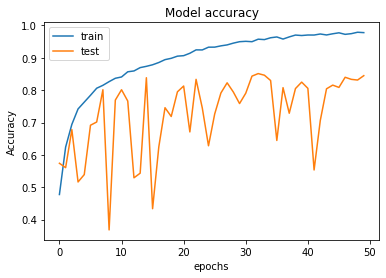

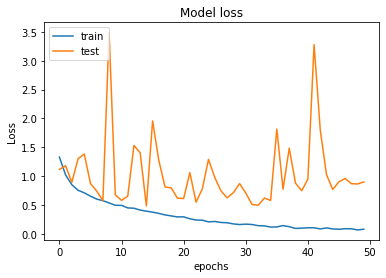

In [17]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel("epochs")
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['train','test'], loc = 'upper left')
plt.show()


In [25]:
test_images, test_labels = get_images('G:\deep learning\Intel_natural_image_classifier\seg_test\seg_test')


In [26]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)
test_labels = to_categorical(test_labels)

In [27]:
print(test_labels[0])

[1. 0. 0. 0. 0. 0.]


In [29]:
test_images = test_images.astype('float32')
test_images /= 255.0

In [36]:
model.evaluate(test_images, test_labels, verbose = 1)

94/94 [==============================] - 85s 909ms/step - loss: 0.9342 - accuracy: 0.8493


[0.934224545955658, 0.8493333458900452]

In [37]:
pred_images, pred_labels = get_images('G:\deep learning\Intel_natural_image_classifier\seg_pred')
pred_images = np.array(pred_images)
pred_images.shape

(7301, 150, 150, 3)

In [43]:
pred_image = pred_images[1:30]
pred_image = pred_image.astype('float32')
pred_image /= 255.0

Model Prediction: Street


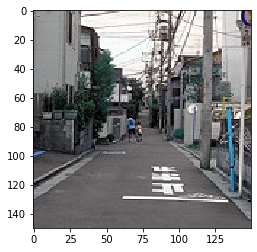

In [68]:
pred_class = model.predict_classes(np.array([pred_images[0]]))
plt.imshow(pred_images[0])
prediction = "none"
if(pred_class == 0):
    prediction = "Building"
elif(pred_class == 1):
    prediction = "Forest"  
elif(pred_class == 2):
    prediction = "Glacier"    
elif(pred_class == 3):
    prediction = "Mountain"
elif(pred_class == 4):
    prediction = 'Sea'
elif(pred_class == 5):
    prediction = "Street"
print("Model Prediction: " + prediction)